In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.utils import compute_sample_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from scipy.stats import describe, kurtosis
from sklearn.decomposition import FastICA, PCA
from sklearn import random_projection
from mpl_toolkits.mplot3d import Axes3D

In [2]:
random_seed = 42
np.random.seed(random_seed)

In [3]:
adult_train = pd.read_csv("adult-t.tsv", sep = "\t")
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,42.0,4,308770.0,15,10.0,2,1,0,2,1,0.0,0.0,40.0,39,0
1,23.0,4,520231.0,15,10.0,4,10,1,4,0,0.0,0.0,45.0,39,1
2,27.0,4,164924.0,11,9.0,4,3,1,4,1,0.0,0.0,40.0,39,1
3,29.0,6,198286.0,9,13.0,4,10,1,4,0,0.0,0.0,40.0,39,1
4,32.0,4,197505.0,11,9.0,4,1,3,4,0,0.0,0.0,40.0,39,1


In [4]:
adult_train = pd.get_dummies(adult_train, columns=['workclass', 'education', 'sex', 'occupation', 'relationship', 'race', 'native-country', 'marital-status'])
adult_train.shape

(10000, 108)

In [5]:
normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week']
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  adult_train[columns] = scaler.fit_transform(adult_train[columns])
normalize(normalize_columns)

In [6]:
adult_train.shape

(10000, 108)

In [7]:
X_a = adult_train[[c for c in adult_train.columns if c != 'target']]
y_a = adult_train['target']
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.3, stratify=y_a, random_state=random_seed)

### KMeans

In [8]:
k_grid_a = np.hstack((
    np.arange(2, 10),
    np.arange(10, 21, 2),
    np.array([30, 40, 50, 60, 80]),
    np.arange(100, 120, 10),
)).astype(np.int)
print(k_grid_a)

[  2   3   4   5   6   7   8   9  10  12  14  16  18  20  30  40  50  60
  80 100 110]


In [9]:
# Find the optimal k
loss1 = np.zeros(k_grid_a.size)
sil_score1 = np.zeros(k_grid_a.size)
for idx, k in enumerate(k_grid_a):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs=-1)
    kmeans.fit(X_train_a)
    labels=kmeans.predict(X_train_a)
    loss1[idx] = kmeans.inertia_
    sil_score1[idx] = silhouette_score(X_train_a, labels, metric='euclidean')

k =  2


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  3


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  4


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  5


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  6


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  7


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  8


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  9


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  10


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  12


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  14


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  16


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  18


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  20


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  30


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  40


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  50


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  60


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  80


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  100


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  110


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


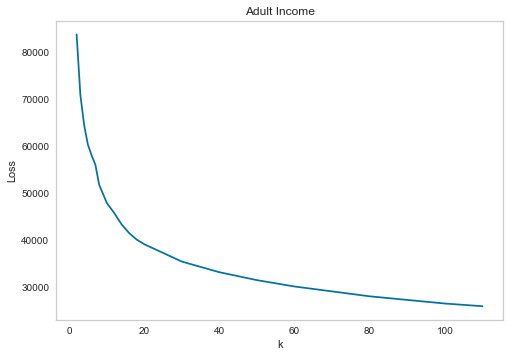

In [10]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid_a, loss1)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Adult Income')
plt.grid()

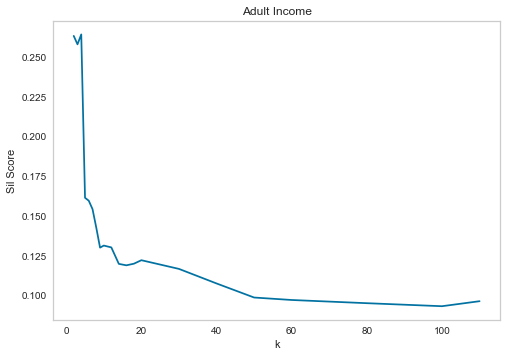

In [11]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid_a, sil_score1)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Sil Score')
plt.title('Adult Income')
plt.grid()

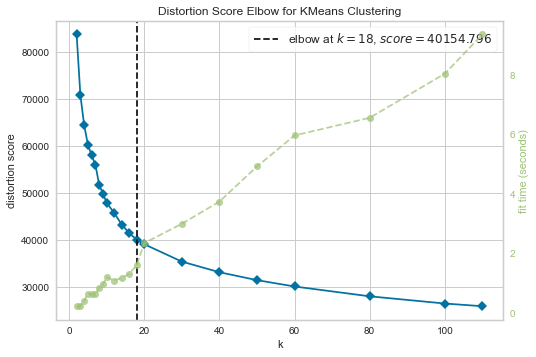

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
model_a = KMeans(random_state=random_seed)
visualizer_a = KElbowVisualizer(model_a, k=k_grid_a)

visualizer_a.fit(X_train_a)
visualizer_a.show()

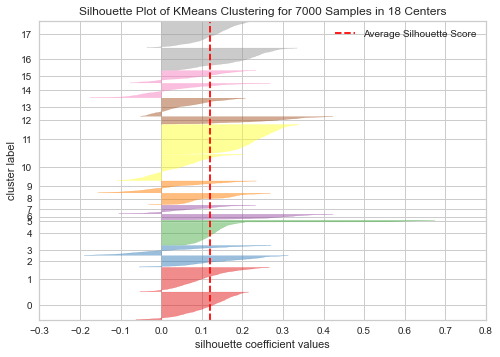

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7000 Samples in 18 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
s_viz = SilhouetteVisualizer(KMeans(n_clusters=18, random_state=random_seed))
s_viz.fit(X_train_a)
s_viz.show()

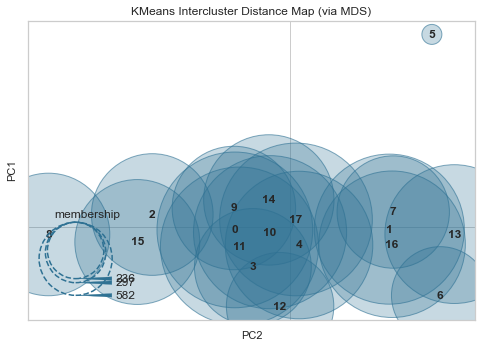

In [77]:
visualizer = InterclusterDistance(KMeans(n_clusters=18, random_state=random_seed))
visualizer.fit(X_train_a)
visualizer.finalize()

### Expectation Maximization (EM)

In [14]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [15]:
n_clusters=np.arange(2, 20)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_train_a) 
        
        tmp_bic.append(gmm.bic(X_train_a))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

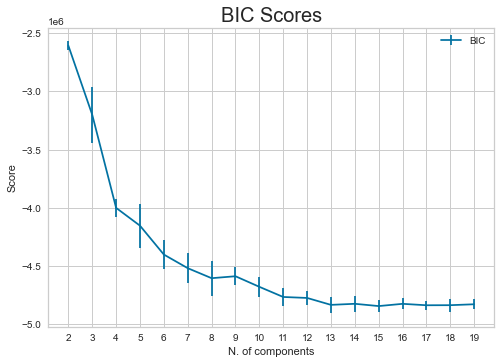

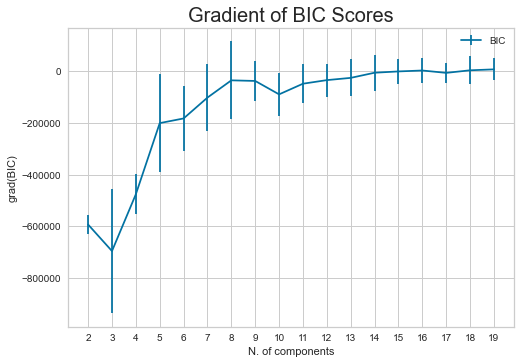

<Figure size 576x396 with 0 Axes>

In [16]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [78]:
#EM Validation method
n=7
gmm=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_train_a)
y_gmm = gmm.fit_predict(X_train_a)

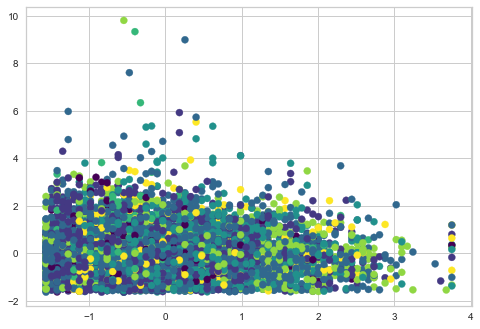

In [79]:
plt.scatter(X_train_a.iloc[:, 0], X_train_a.iloc[:, 1], c=y_gmm, s=50, cmap='viridis')

### PCA 

In [82]:
pca = PCA(
    n_components=None,
    random_state=0,
)
pca.fit(X_train_a)
pca.explained_variance_ratio_

array([4.19998090e-01, 8.80700388e-02, 6.54582755e-02, 6.30884252e-02,
       5.88282566e-02, 5.73024755e-02, 3.77351309e-02, 1.88939461e-02,
       1.66812810e-02, 1.51688956e-02, 1.21888335e-02, 1.05509710e-02,
       1.03314561e-02, 8.86023889e-03, 8.03363272e-03, 7.12654948e-03,
       7.05449310e-03, 6.54054767e-03, 6.42204933e-03, 6.34455330e-03,
       5.58632694e-03, 5.17597367e-03, 4.78183467e-03, 4.17060245e-03,
       3.61860674e-03, 3.31217439e-03, 3.01580580e-03, 2.86397679e-03,
       2.82515268e-03, 2.72065198e-03, 2.61133425e-03, 2.35205444e-03,
       2.23650483e-03, 2.15568504e-03, 2.13250651e-03, 2.00583232e-03,
       1.86442721e-03, 1.81129190e-03, 1.76832541e-03, 1.60496514e-03,
       1.49236991e-03, 1.33291445e-03, 1.17645292e-03, 1.06975741e-03,
       1.04195526e-03, 9.25608078e-04, 9.04389838e-04, 8.84149789e-04,
       8.57841567e-04, 8.01866050e-04, 6.76891612e-04, 5.47777176e-04,
       3.01887975e-04, 2.87067685e-04, 2.79353735e-04, 2.63133228e-04,
      

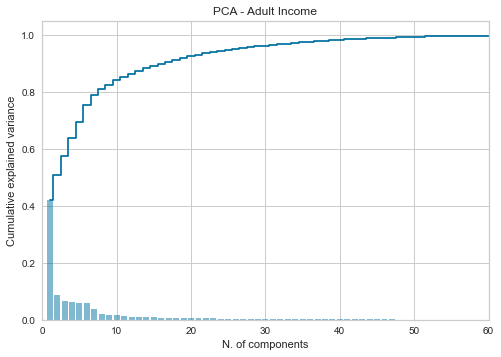

In [83]:
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 
        align='center', alpha=0.5, label='Individual explained variance')
plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), 
        where='mid', label='Cumulative explained variance')
plt.xlim([0, 60])
plt.xlabel('N. of components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA - Adult Income")
plt.show()

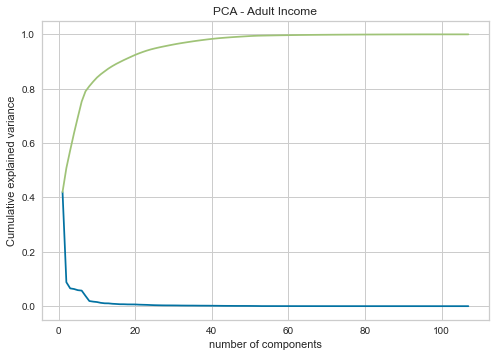

In [19]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label='Individual explained variance')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label='Cumulative explained variance')
#plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA - Adult Income")
plt.show()

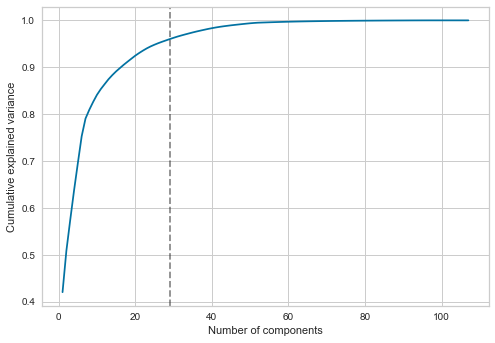

In [20]:
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.axvline(29, linestyle='--', color='k', alpha=0.5)

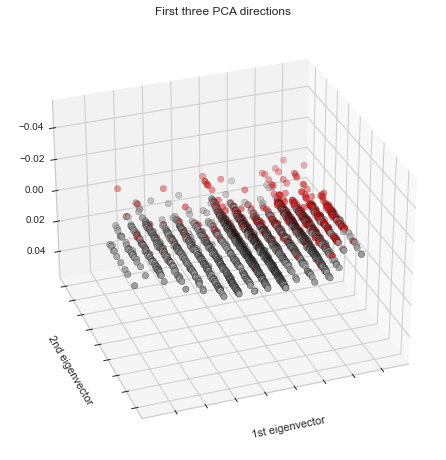

In [21]:
n = 30
pca = PCA(n_components=n) 
X_pca=pca.fit_transform(X_train_a)

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_a,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

plt.show()

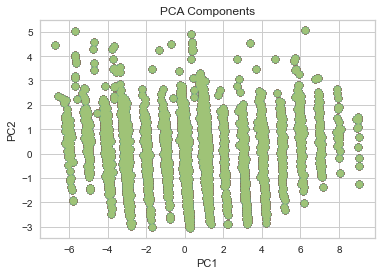

In [87]:
n = 8
pca = PCA(n_components=n, random_state=random_seed) 
X_pca=pca.fit_transform(X_train_a)

plt.figure(figsize=(6,4))
plt.title('PCA Components')
plt.ylabel('PC2')
plt.xlabel('PC1')
for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_pca[:,0], X_pca[:,1])

### ICA 

In [23]:
#print(kurtosis(tmp_X_tr, axis=0).sum())
adult_train.kurt()

age                  -0.136460
fnlwgt                5.283129
education-num         0.576105
capital-gain        139.926969
capital-loss         19.686732
                       ...    
marital-status_2     -1.968447
marital-status_3     70.806951
marital-status_4     -1.480770
marital-status_5     25.722004
marital-status_6     27.304306
Length: 108, dtype: float64

In [24]:
component_counts = np.hstack((
    np.arange(2, 10),
    np.arange(10, 21, 2),
    np.array([30, 40, 50, 60, 80, 90]),
    np.arange(95, 109, 2),
)).astype(np.int)
total_kurtosis = {}

for component_count in component_counts:
    tmp_ica = FastICA(
        random_state=random_seed,
        n_components=component_count, max_iter=1000)
    tmp_X_tr = tmp_ica.fit_transform(X_train_a)
    total_kurtosis[component_count] = (np.abs(kurtosis(tmp_X_tr, axis=0)).sum())/component_count
    #total_kurtosis[component_count] = kurtosis(tmp_X_tr, axis=0).sum()

print(total_kurtosis)

D:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
D:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
D:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
D:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
D:\anaco

{2: 0.2762481642342911, 3: 24.238113699091844, 4: 18.230639482129167, 5: 16.015555917563567, 6: 26.866751933446835, 7: 23.4034066114523, 8: 20.53840766258698, 9: 18.50666711545739, 10: 16.804542991467713, 12: 14.371850375199465, 14: 12.577545393097916, 16: 11.127029350752071, 18: 10.367291415539357, 20: 9.995750051412738, 30: 9.75747720119943, 40: 14.337517801124914, 50: 23.178929891713402, 60: 49.49195906905461, 80: 164.8687796034152, 90: 294.55827719167326, 95: 403.38778684719307, 97: 461.9779996390257, 99: 459.9316180820376, 101: 390.00781638099596, 103: 300.9073458415154, 105: 267.8578547602886, 107: 236.92489775990546}


D:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


[]

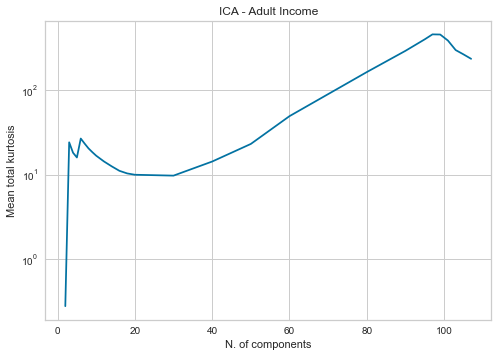

In [104]:
pd.Series(total_kurtosis).plot()
plt.title("ICA - Adult Income")
plt.ylabel('Mean total kurtosis')
plt.xlabel('N. of components')
plt.semilogy()

In [26]:
ica10 = FastICA(
    random_state=random_seed,
    n_components=108, max_iter=1000)
X_tr10 = ica10.fit_transform(X_train_a)
kurt_df10 = pd.DataFrame(kurtosis(X_tr10, axis=0), columns=['kurtosis'])
kurt_df10.sort_values(by='kurtosis', ascending=False)

D:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:468: UserWarning: n_components is too large: it will be set to 107
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


,kurtosis
94,3347.370781
39,1287.261637
48,1059.326435
28,982.429384
106,919.205151
...,...
43,0.539390
26,0.444774
54,0.258860
1,0.199811


<AxesSubplot:>

<Figure size 576x396 with 0 Axes>

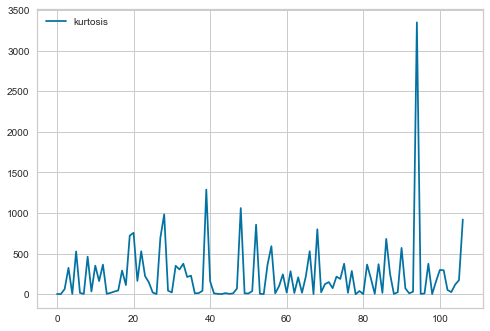

In [27]:
plt.figure()
kurt_df10.plot()

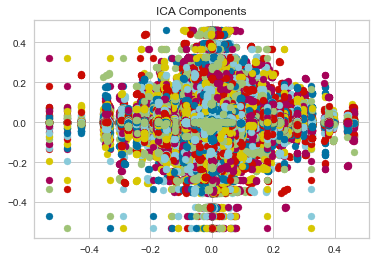

In [28]:
n = 98
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=random_seed) 
X_ica=ica.fit_transform(X_train_a)

plt.figure(figsize=(6,4))
plt.title('ICA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_ica[:,i], X_ica[:,j])

### Randomized projections Sparse

In [29]:
best_n = (0, 0)
for i in range(2, 108):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=random_seed).fit(X_train_a)
    X_rp = rp.fit_transform(X_train_a)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train_a, test_size=0.2, random_state=random_seed)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3, random_state=random_seed)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.SparseRandomProjection(n_components=best_n[0], random_state=random_seed).fit(X_train_a)
X_rp = rp.fit_transform(X_train_a)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train_a, test_size=0.2, random_state=random_seed)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 8
Test Accuracy: 0.8271428571428572


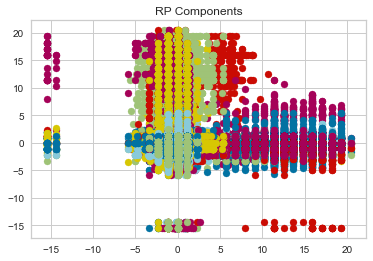

In [30]:
n = 8
rps = random_projection.SparseRandomProjection(n_components=n, random_state=random_seed)
X_rps=rps.fit_transform(X_train_a)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_rp[:,i], X_rp[:,j])

### Randomized Projections Gaussian 

In [31]:
best_n = (0, 0)
for i in range(2, 108):
    rp = random_projection.GaussianRandomProjection(n_components=i, random_state=random_seed).fit(X_train_a)
    X_rp = rp.fit_transform(X_train_a)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train_a, test_size=0.2, random_state=random_seed)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3, random_state=random_seed)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.GaussianRandomProjection(n_components=best_n[0], random_state=random_seed).fit(X_train_a)
X_rp = rp.fit_transform(X_train_a)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train_a, test_size=0.2, random_state=random_seed)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 75
Test Accuracy: 0.8014285714285714


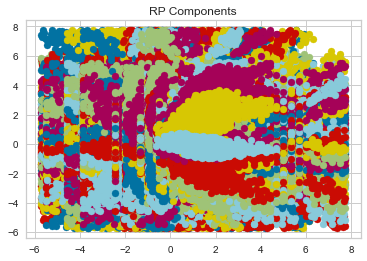

In [32]:
n = 75
rpg = random_projection.GaussianRandomProjection(n_components=n, random_state=random_seed)
X_rpg=rpg.fit_transform(X_train_a)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_rp[:,i], X_rp[:,j])

In [33]:
print (X_train_a.shape)
n_c = np.arange(2,108)
loss_r = np.zeros(n_c.size)
for idx, i in enumerate(n_c):
    rp = random_projection.GaussianRandomProjection(n_components=i, random_state=random_seed)#.fit(X_train_c)
    X_rp = rp.fit_transform(X_train_a)
    inverse_data = np.linalg.pinv(rp.components_.T)
    reconstructed_data = X_rp.dot(inverse_data)
    loss_r[idx] = mean_squared_error(X_train_a,reconstructed_data)

(7000, 107)


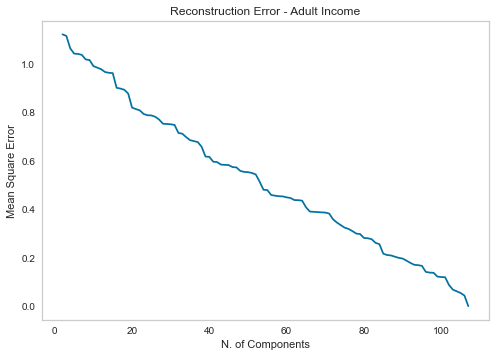

In [113]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(n_c, loss_r)
# plt.xticks(k_grid)
plt.xlabel('N. of Components')
plt.ylabel('Mean Square Error')
plt.title('Reconstruction Error - Adult Income')
plt.grid()

## KMeans + DR 

### KMeans + PCA 

In [92]:
k_grid_pca = np.arange(2, 9, 1)
loss_pca = np.zeros(k_grid_pca.size)
sil_score_pca = np.zeros(k_grid_pca.size)
for idx, k in enumerate(k_grid_pca):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X_pca)
    labels_pca=kmeans.predict(X_pca)
    loss_pca[idx] = kmeans.inertia_
    sil_score_pca[idx] = silhouette_score(X_pca, labels_pca, metric='euclidean')

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8


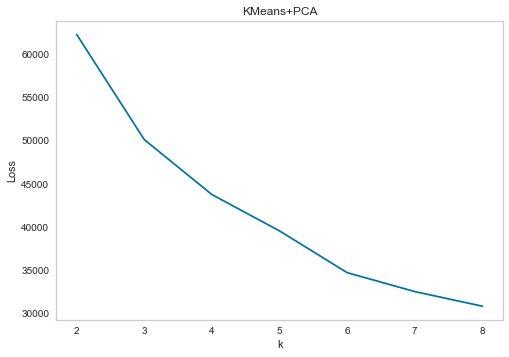

In [93]:
plt.figure()
plt.plot(k_grid_pca, loss_pca)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('KMeans+PCA')
plt.grid()

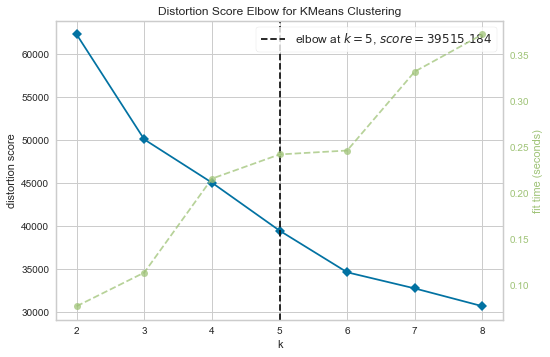

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
model_pca = KMeans()
visualizer_pca = KElbowVisualizer(model_pca, k=k_grid_pca)

visualizer_pca.fit(X_pca)
visualizer_pca.show() 

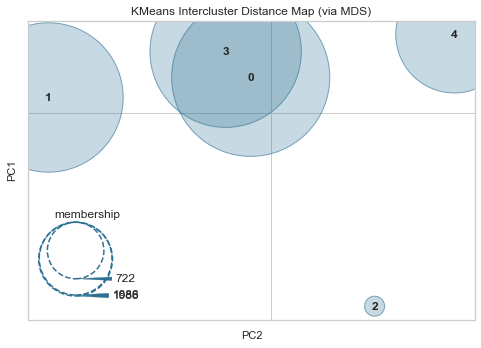

In [95]:
kmeans = KMeans(n_clusters=5, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca)
visualizer.finalize()

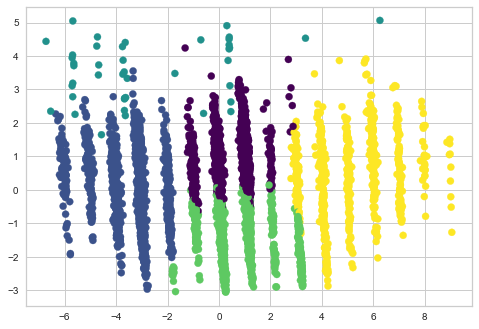

In [96]:
labels_pca=kmeans.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, s=50, cmap='viridis')

### Kmeans + ICA 

In [105]:
k_grid_ica = np.arange(2, 99, 10)
loss_ica = np.zeros(k_grid_ica.size)
sil_score_ica = np.zeros(k_grid_ica.size)
for idx, k in enumerate(k_grid_ica):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X_ica)
    labels_ica=kmeans.predict(X_ica)
    loss_ica[idx] = kmeans.inertia_
    sil_score_ica[idx] = silhouette_score(X_ica, labels_ica, metric='euclidean')

k =  2
k =  12
k =  22
k =  32
k =  42
k =  52
k =  62
k =  72
k =  82
k =  92


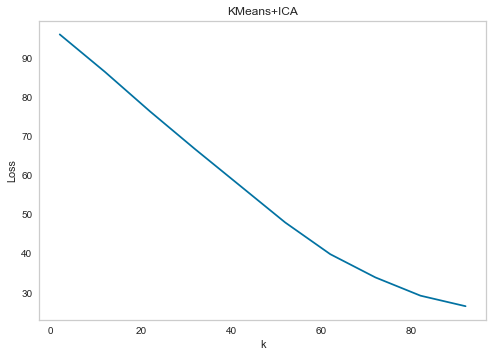

In [106]:
plt.figure()
plt.plot(k_grid_ica, loss_ica)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('KMeans+ICA')
plt.grid()

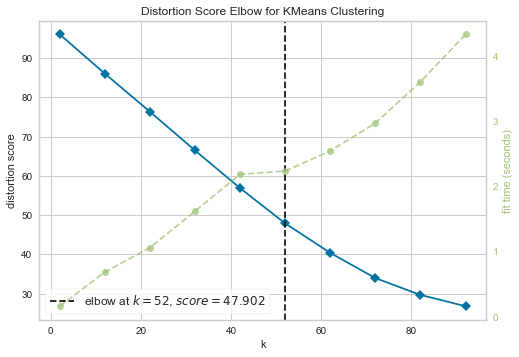

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
model_ica = KMeans()
visualizer_ica = KElbowVisualizer(model_ica, k=k_grid_ica)

visualizer_ica.fit(X_ica)
visualizer_ica.show()

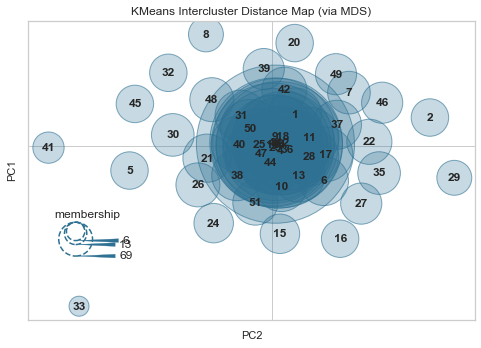

In [108]:
kmeans = KMeans(n_clusters=52, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_ica)
visualizer.finalize()

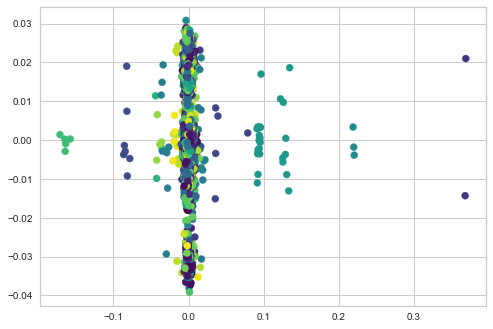

In [58]:
labels_ica=kmeans.predict(X_ica)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=labels_ica, s=50, cmap='viridis')

### KMeans + RP Sparse 

In [115]:
k_grid_rps = np.arange(2, 9, 1)
loss_rps = np.zeros(k_grid_rps.size)
sil_score_rps = np.zeros(k_grid_rps.size)
for idx, k in enumerate(k_grid_rps):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X_rps)
    labels_rps=kmeans.predict(X_rps)
    loss_rps[idx] = kmeans.inertia_
    sil_score_rps[idx] = silhouette_score(X_rps, labels_rps, metric='euclidean')

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8


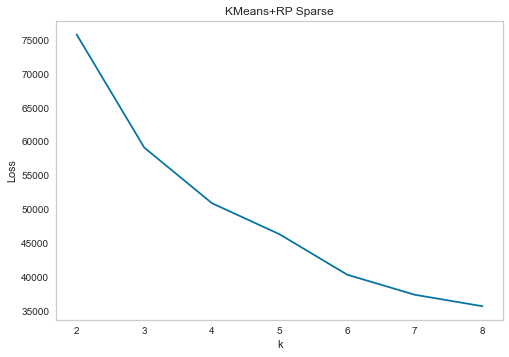

In [116]:
plt.figure()
plt.plot(k_grid_rps, loss_rps)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('KMeans+RP Sparse')
plt.grid()

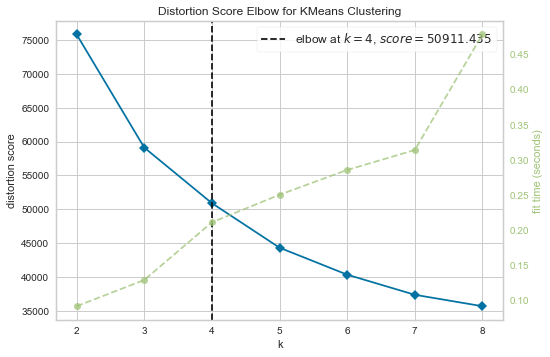

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [117]:
model_rps = KMeans()
visualizer_rps = KElbowVisualizer(model_rps, k=k_grid_rps)

visualizer_rps.fit(X_rps)
visualizer_rps.show()

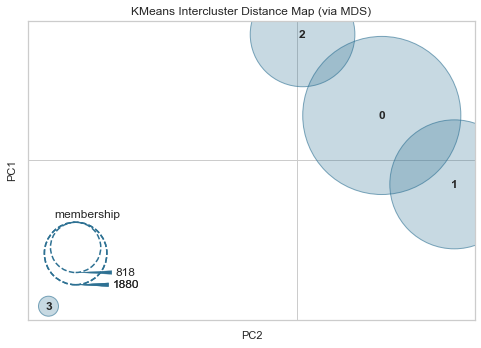

In [118]:
kmeans = KMeans(n_clusters=4, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_rps)
visualizer.finalize()

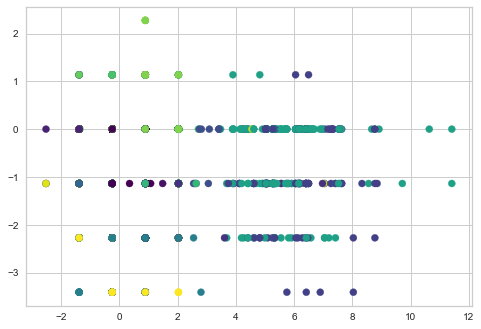

In [60]:
labels_rps=kmeans.predict(X_rps)
plt.scatter(X_rps[:, 0], X_rps[:, 1], c=labels_rps, s=50, cmap='viridis')

### KMeans + RP Gaussian 

In [44]:
k_grid_rpg = np.arange(2, 111, 10)
loss_rpg = np.zeros(k_grid_rpg.size)
sil_score_rpg = np.zeros(k_grid_rpg.size)
for idx, k in enumerate(k_grid_rpg):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X_rpg)
    labels_rpg=kmeans.predict(X_rpg)
    loss_rpg[idx] = kmeans.inertia_
    sil_score_rpg[idx] = silhouette_score(X_rpg, labels_rpg, metric='euclidean')

k =  2
k =  12
k =  22
k =  32
k =  42
k =  52
k =  62
k =  72
k =  82
k =  92
k =  102


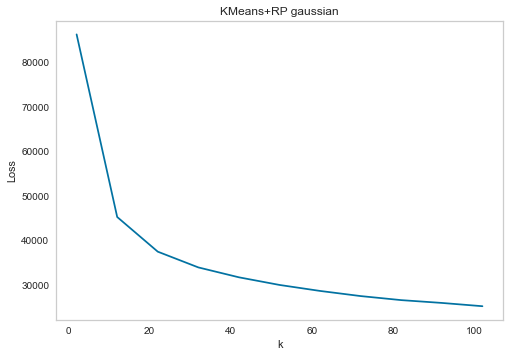

In [45]:
plt.figure()
plt.plot(k_grid_rpg, loss_rpg)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('KMeans+RP gaussian')
plt.grid()

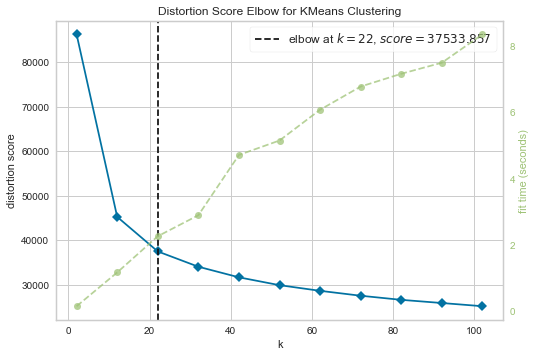

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
model_rpg = KMeans()
visualizer_rpg = KElbowVisualizer(model_rpg, k=k_grid_rpg)

visualizer_rpg.fit(X_rpg)
visualizer_rpg.show()

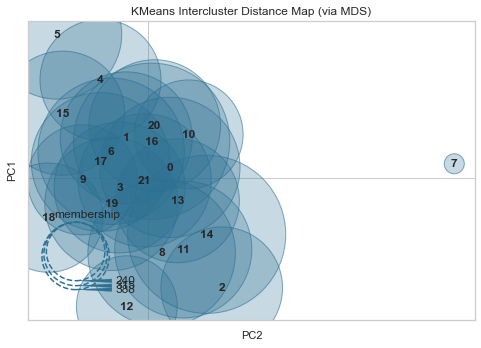

In [61]:
kmeans = KMeans(n_clusters=22, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_rpg)
visualizer.finalize()

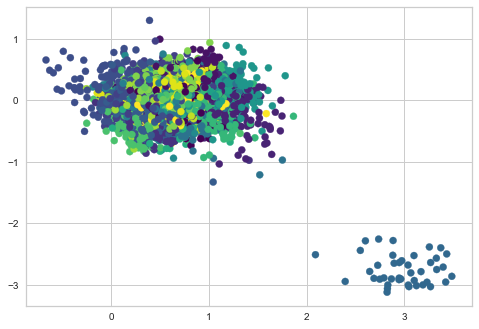

In [62]:
labels_rpg=kmeans.predict(X_rpg)
plt.scatter(X_rpg[:, 0], X_rpg[:, 1], c=labels_rpg, s=50, cmap='viridis')

## EM + DR 

### EM + PCA

In [97]:
n_clusters_pca=np.arange(2, 9, 1)
bics_pca=[]
bics_err_pca=[]
iterations=20
for n in n_clusters_pca:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_pca) 
        
        tmp_bic.append(gmm.bic(X_pca))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_pca.append(val)
    bics_err_pca.append(err)

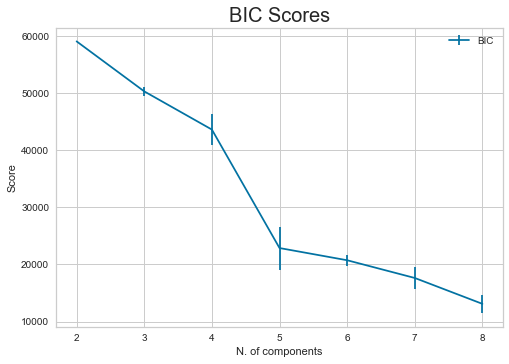

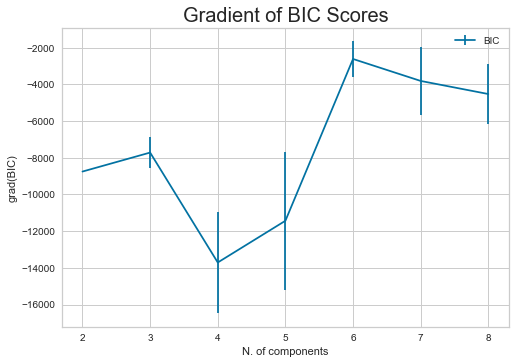

<Figure size 576x396 with 0 Axes>

In [98]:
plt.errorbar(n_clusters_pca,bics_pca, yerr=bics_err_pca, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters_pca)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters_pca, np.gradient(bics_pca), yerr=bics_err_pca, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters_pca)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [99]:
n=5
gmm_pca=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_pca)
y_gmm_pca = gmm_pca.fit_predict(X_pca)

Text(0, 0.5, 'PC2')

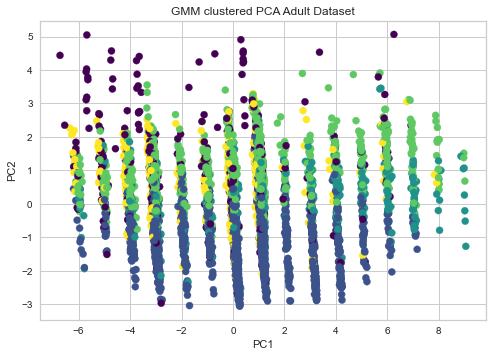

In [103]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_gmm_pca, s=50, cmap='viridis')
plt.title("GMM clustered PCA Adult Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")

### EM + ICA 

In [109]:
n_clusters_ica=np.arange(2, 99, 10)
bics_ica=[]
bics_err_ica=[]
iterations=20
for n in n_clusters_ica:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_ica) 
        
        tmp_bic.append(gmm.bic(X_ica))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_ica.append(val)
    bics_err_ica.append(err)

KeyboardInterrupt: 

In [ ]:
plt.errorbar(n_clusters_ica,bics_ica, yerr=bics_err_ica, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters_ica)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters_ica, np.gradient(bics_ica), yerr=bics_err_ica, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters_ica)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [110]:
n=12
gmm_ica=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_ica)
y_gmm_ica = gmm_ica.fit_predict(X_ica)

Text(0, 0.5, 'IC2')

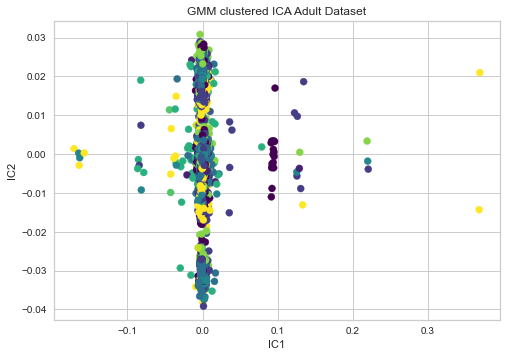

In [112]:
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y_gmm_ica, s=50, cmap='viridis')
plt.title("GMM clustered ICA Adult Dataset")
plt.xlabel("IC1")
plt.ylabel("IC2")

### EM + RP Sparse 

In [119]:
n_clusters_rps=np.arange(2, 9, 1)
bics_rps=[]
bics_err_rps=[]
iterations=20
for n in n_clusters_rps:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_rps) 
        
        tmp_bic.append(gmm.bic(X_rps))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_rps.append(val)
    bics_err_rps.append(err)

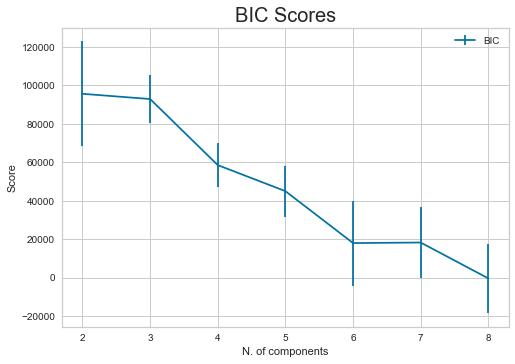

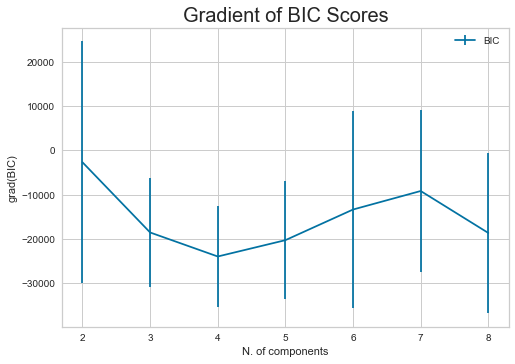

<Figure size 576x396 with 0 Axes>

In [120]:
plt.errorbar(n_clusters_rps,bics_rps, yerr=bics_err_rps, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters_rps)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters_rps, np.gradient(bics_rps), yerr=bics_err_rps, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters_rps)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [121]:
n=6
gmm_rps=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_rps)
y_gmm_rps = gmm_rps.fit_predict(X_rps)

Text(0, 0.5, 'C2')

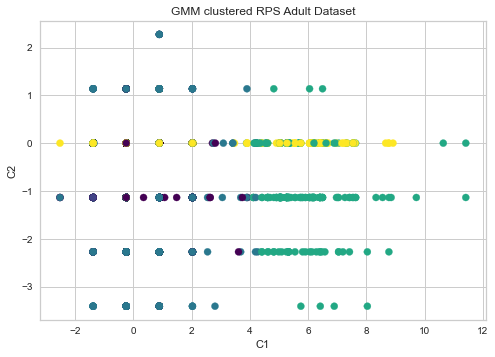

In [122]:
plt.scatter(X_rps[:, 0], X_rps[:, 1], c=y_gmm_rps, s=50, cmap='viridis')
plt.title("GMM clustered RPS Adult Dataset")
plt.xlabel("C1")
plt.ylabel("C2")

### EM + RP Gaussian 

In [53]:
n_clusters_rpg=np.arange(2, 111, 10)
bics_rpg=[]
bics_err_rpg=[]
iterations=20
for n in n_clusters_rpg:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_rpg) 
        
        tmp_bic.append(gmm.bic(X_rpg))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_rpg.append(val)
    bics_err_rpg.append(err)

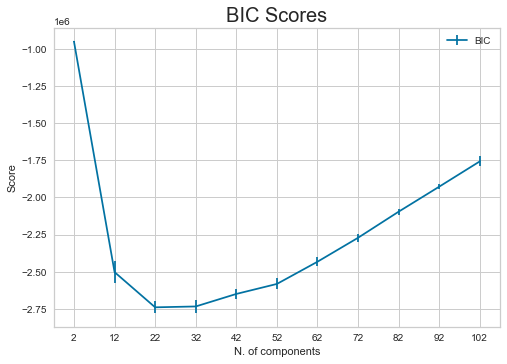

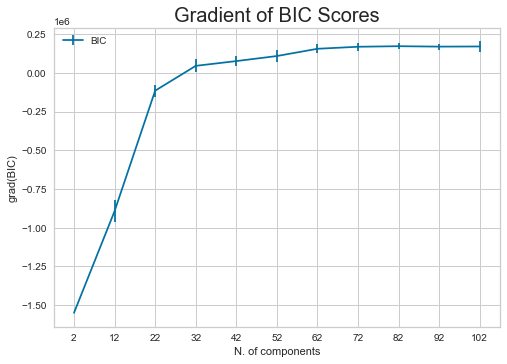

<Figure size 576x396 with 0 Axes>

In [54]:
plt.errorbar(n_clusters_rpg,bics_rpg, yerr=bics_err_rpg, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters_rpg)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters_rpg, np.gradient(bics_rpg), yerr=bics_err_rpg, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters_rpg)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [69]:
n=22
gmm_rpg=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_rpg)
y_gmm_rpg = gmm_rpg.fit_predict(X_rpg)

Text(0, 0.5, 'C2')

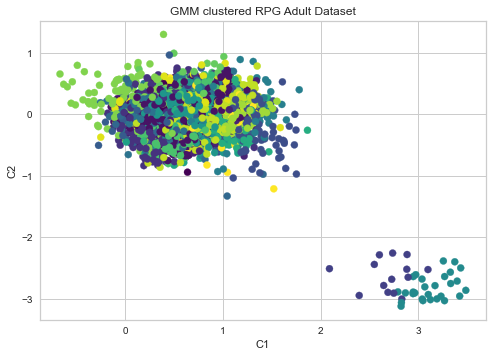

In [114]:
plt.scatter(X_rpg[:, 0], X_rpg[:, 1], c=y_gmm_rpg, s=50, cmap='viridis')
plt.title("GMM clustered RPG Adult Dataset")
plt.xlabel("C1")
plt.ylabel("C2")